In [301]:
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import numpy as np

In [302]:
df = pd.read_csv('data_copy.csv')

In [253]:
df.head()

,Id,Province/State,Country/Region,Lat,Long,Date,ConfirmedCases,Fatalities
0,1,NaN,Afghanistan,33.0,65.0,2020-01-22,0.0,0.0
1,2,NaN,Afghanistan,33.0,65.0,2020-01-23,0.0,0.0
2,3,NaN,Afghanistan,33.0,65.0,2020-01-24,0.0,0.0
3,4,NaN,Afghanistan,33.0,65.0,2020-01-25,0.0,0.0
4,5,NaN,Afghanistan,33.0,65.0,2020-01-26,0.0,0.0


In [254]:
print("Number of Country/Region is", df['Country/Region'].nunique())

print("Countries with Province/State informed are"
      , df[df['Province/State'].isna()==False]['Country/Region'].unique())

Number of Country/Region is 163
Countries with Province/State informed are ['Australia' 'Canada' 'China' 'Cruise Ship' 'Denmark' 'France'
 'Netherlands' 'US' 'United Kingdom']


In [255]:
df.describe()

,Id,Lat,Long,ConfirmedCases,Fatalities
count,17892.000000,17892.000000,17892.000000,17892.000000,17892.000000
mean,13191.500000,26.287693,4.766191,325.207523,11.974737
std,7624.675152,22.935092,79.923261,3538.599684,174.346267
min,1.000000,-41.454500,-157.498300,0.000000,0.000000
25%,6596.250000,13.145425,-71.516375,0.000000,0.000000
50%,13191.500000,32.985550,9.775000,0.000000,0.000000
75%,19786.750000,42.501575,64.688975,10.000000,0.000000
max,26382.000000,71.706900,174.886000,69176.000000,6820.000000


Text(0.5, 0, 'Date')

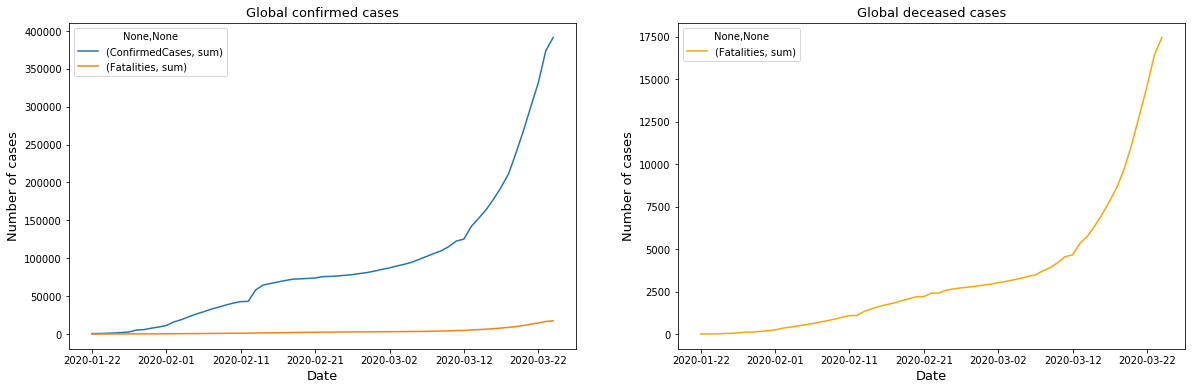

In [256]:
confirmed_dates = df.groupby(['Date']).agg({'ConfirmedCases':['sum']})
fatalities_dates = df.groupby(['Date']).agg({'Fatalities':['sum']})
total_dates = confirmed_dates.join(fatalities_dates)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,6))
total_dates.plot(ax=ax1)
ax1.set_title("Global confirmed cases", size=13)
ax1.set_ylabel("Number of cases", size=13)
ax1.set_xlabel("Date", size=13)
fatalities_dates.plot(ax=ax2, color='orange')
ax2.set_title("Global deceased cases", size=13)
ax2.set_ylabel("Number of cases", size=13)
ax2.set_xlabel("Date", size=13)

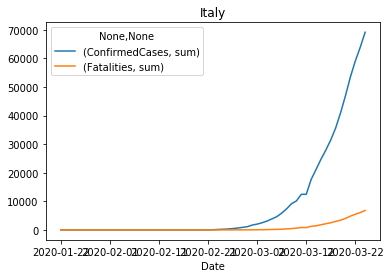

In [259]:
confirmed_total_date_Italy = df[df['Country/Region']=='Italy'].groupby(['Date']).agg({'ConfirmedCases':['sum']})
fatalities_total_date_Italy = df[df['Country/Region']=='Italy'].groupby(['Date']).agg({'Fatalities':['sum']})
total_date_Italy = confirmed_total_date_Italy.join(fatalities_total_date_Italy)
total_date_Italy.plot(ax=plt.gca(), title='Italy')

In [371]:
# building datasets for every country
# &(df['Lat'] == df[df['Country/Region'] == c].Lat.iloc[0])
countries_data = {}
for c in df['Country/Region'].unique():
    countries_data[c]=df[(df['Country/Region'] == c)]
    countries_data[c].insert(0, 'New_ID', countries_data[c].Id - countries_data[c].Id.iloc[0])

In [400]:
countries_data['China']

,New_ID,Id,Province/State,Country/Region,Lat,Long,Date,ConfirmedCases,Fatalities
2961,0,4372,Anhui,China,31.8257,117.2264,2020-01-22,1.0,0.0
2962,1,4373,Anhui,China,31.8257,117.2264,2020-01-23,9.0,0.0
2963,2,4374,Anhui,China,31.8257,117.2264,2020-01-24,15.0,0.0
2964,3,4375,Anhui,China,31.8257,117.2264,2020-01-25,39.0,0.0
2965,4,4376,Anhui,China,31.8257,117.2264,2020-01-26,60.0,0.0
...,...,...,...,...,...,...,...,...,...
5035,3034,7406,Zhejiang,China,29.1832,120.0934,2020-03-20,1234.0,1.0
5036,3035,7407,Zhejiang,China,29.1832,120.0934,2020-03-21,1236.0,1.0
5037,3036,7408,Zhejiang,China,29.1832,120.0934,2020-03-22,1237.0,1.0
5038,3037,7409,Zhejiang,China,29.1832,120.0934,2020-03-23,1238.0,1.0


In [409]:
# applying polynomial regression
x = countries_data['China']
x = x[(x.Lat == 29.1832) & (x.Long == 120.0934)]
x.New_ID = x.New_ID - x.New_ID.iloc[0]
x

/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,New_ID,Id,Province/State,Country/Region,Lat,Long,Date,ConfirmedCases,Fatalities
4977,0,7348,Zhejiang,China,29.1832,120.0934,2020-01-22,10.0,0.0
4978,1,7349,Zhejiang,China,29.1832,120.0934,2020-01-23,27.0,0.0
4979,2,7350,Zhejiang,China,29.1832,120.0934,2020-01-24,43.0,0.0
4980,3,7351,Zhejiang,China,29.1832,120.0934,2020-01-25,62.0,0.0
4981,4,7352,Zhejiang,China,29.1832,120.0934,2020-01-26,104.0,0.0
...,...,...,...,...,...,...,...,...,...
5035,58,7406,Zhejiang,China,29.1832,120.0934,2020-03-20,1234.0,1.0
5036,59,7407,Zhejiang,China,29.1832,120.0934,2020-03-21,1236.0,1.0
5037,60,7408,Zhejiang,China,29.1832,120.0934,2020-03-22,1237.0,1.0
5038,61,7409,Zhejiang,China,29.1832,120.0934,2020-03-23,1238.0,1.0


In [410]:
def build_model(c, lat, long, target):

    data = countries_data[c]
    data = data[(data.Lat == lat) & (data.Long == long)]
    data.New_ID = data.New_ID - data.New_ID.iloc[0]
    #X = np.array(countries_data[c]['New_ID']).reshape(-1, 1)
    #y = np.array(countries_data[c][target])
    X = np.array(data['New_ID']).reshape(-1, 1)
    y = np.array(data[target])
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    scores = []

    for i in range(1, 11):
        print("Euation of "+str(i)+" Degree BEGINS")
        poly = PolynomialFeatures(degree=i)
        poly_x = poly.fit_transform(X_train)
        pol_reg = LinearRegression()
        pol_reg.fit(poly_x, y_train)
        print("Euation of "+str(i)+" Degree Ends with acc = "+str(pol_reg.score(poly.fit_transform(X_test), y_test)*100) + "%")
        scores.append(pol_reg.score(poly.fit_transform(X_test), y_test))
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,6))
    ax1.plot(X, y)
    ax1.set_title(c + " confirmed cases", size=13)
    ax1.set_ylabel("Number of cases", size=13)
    ax1.set_xlabel("Date_ID", size=13)
    ax2.plot(range(1, 11), scores, color='orange')
    ax2.set_title("Accuracy vs. Degree", size=13)
    ax2.set_ylabel("Accuracy", size=13)
    ax2.set_xlabel("Degree", size=13)
    
    # finding best degree for each country
    max_ = 0
    max_i = 0
    for index, acc in enumerate(scores):
        if acc > max_:
            max_ = acc
            max_i = index
    print("Best PolynomialDegree is " + str(max_i+1) + " with accuracy " + str(max_*100) + "%")
    return max_i + 1

Euation of 1 Degree BEGINS
Euation of 1 Degree Ends with acc = 17.601380175629078%
Euation of 2 Degree BEGINS
Euation of 2 Degree Ends with acc = 48.19527200485313%
Euation of 3 Degree BEGINS
Euation of 3 Degree Ends with acc = 74.59380003885596%
Euation of 4 Degree BEGINS
Euation of 4 Degree Ends with acc = 91.1644646228905%
Euation of 5 Degree BEGINS
Euation of 5 Degree Ends with acc = 97.81307679754607%
Euation of 6 Degree BEGINS
Euation of 6 Degree Ends with acc = 99.59041836384294%
Euation of 7 Degree BEGINS
Euation of 7 Degree Ends with acc = 99.63452376507084%
Euation of 8 Degree BEGINS
Euation of 8 Degree Ends with acc = 98.66229417006647%
Euation of 9 Degree BEGINS
Euation of 9 Degree Ends with acc = 96.17639723875546%
Euation of 10 Degree BEGINS
Euation of 10 Degree Ends with acc = 94.2039119503486%
Best PolynomialDegree is 7 with accuracy 99.63452376507084%


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


7

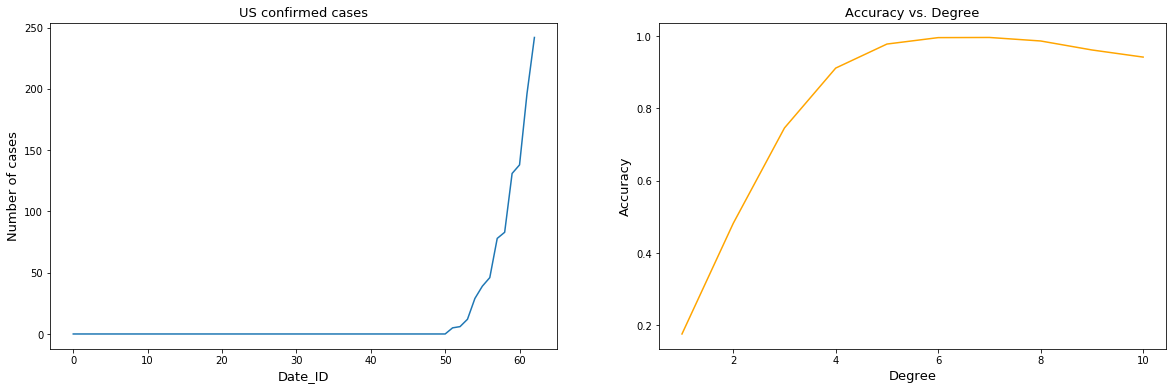

In [412]:
build_model('US',32.3182, -86.9023, 'ConfirmedCases') # for USA

Euation of 1 Degree BEGINS
Euation of 1 Degree Ends with acc = 61.82276248861789%
Euation of 2 Degree BEGINS
Euation of 2 Degree Ends with acc = 93.37571849769769%
Euation of 3 Degree BEGINS
Euation of 3 Degree Ends with acc = 96.90238267639398%
Euation of 4 Degree BEGINS
Euation of 4 Degree Ends with acc = 97.1389072124204%
Euation of 5 Degree BEGINS
Euation of 5 Degree Ends with acc = 99.56642916838554%
Euation of 6 Degree BEGINS
Euation of 6 Degree Ends with acc = 99.69010940138236%
Euation of 7 Degree BEGINS
Euation of 7 Degree Ends with acc = 99.80162621462463%
Euation of 8 Degree BEGINS
Euation of 8 Degree Ends with acc = 99.93647589112919%
Euation of 9 Degree BEGINS
Euation of 9 Degree Ends with acc = 99.91615096566865%
Euation of 10 Degree BEGINS
Euation of 10 Degree Ends with acc = 99.87487895350668%
Best PolynomialDegree is 8 with accuracy 99.93647589112919%


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


8

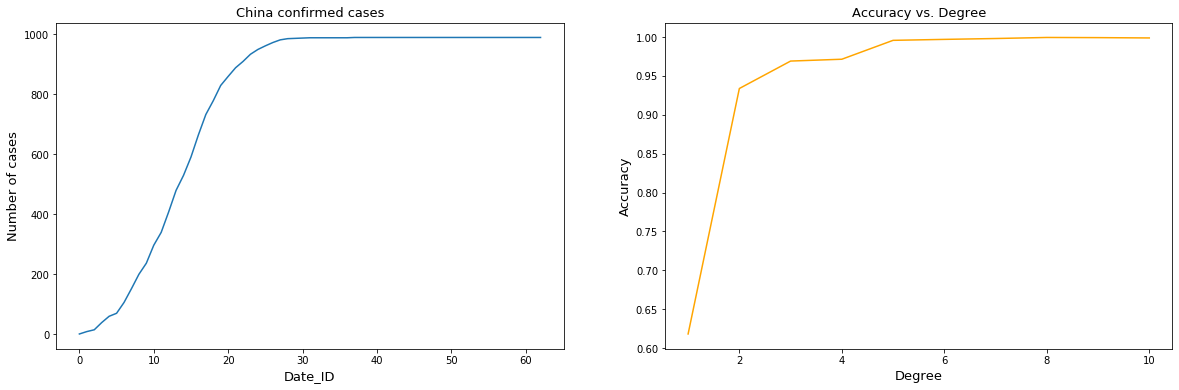

In [411]:
build_model('China', 31.8257 ,117.2264, 'ConfirmedCases') # for France

Euation of 1 Degree BEGINS
Euation of 1 Degree Ends with acc = -27.540138474981934%
Euation of 2 Degree BEGINS
Euation of 2 Degree Ends with acc = 67.27698033812088%
Euation of 3 Degree BEGINS
Euation of 3 Degree Ends with acc = 81.69435981016076%
Euation of 4 Degree BEGINS
Euation of 4 Degree Ends with acc = 98.89306510505241%
Euation of 5 Degree BEGINS
Euation of 5 Degree Ends with acc = 99.90232650840089%
Euation of 6 Degree BEGINS
Euation of 6 Degree Ends with acc = 99.90683854895688%
Euation of 7 Degree BEGINS
Euation of 7 Degree Ends with acc = 99.97871388864853%
Euation of 8 Degree BEGINS
Euation of 8 Degree Ends with acc = 99.9896923277255%
Euation of 9 Degree BEGINS
Euation of 9 Degree Ends with acc = 99.9885889864678%
Euation of 10 Degree BEGINS
Euation of 10 Degree Ends with acc = 99.98706773815525%
Best PolynomialDegree is 8 with accuracy 99.9896923277255%


8

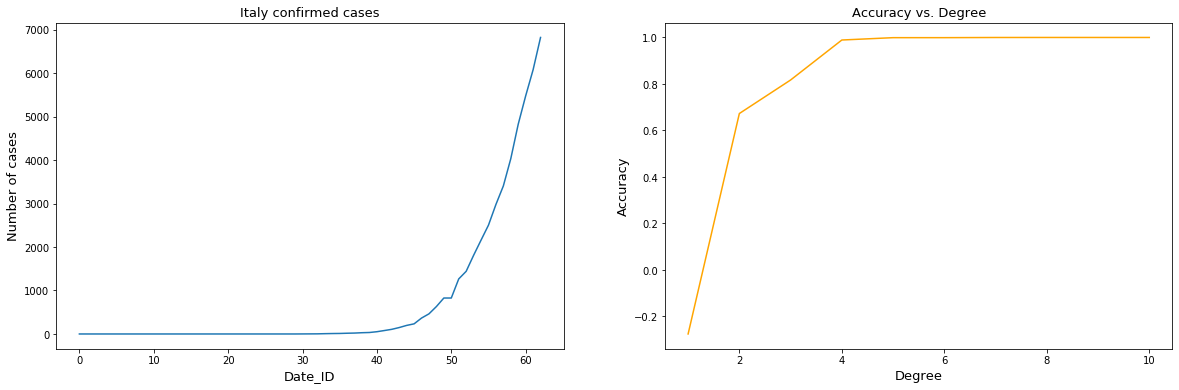

In [413]:
build_model('Italy',43,12, 'Fatalities') # for Egypt

In [ ]:
Poly = PolynomialFeatures(degree=i)
poly_x = poly.fit_transform(X_train)
pol_reg = LinearRegression()
pol_reg.fit(poly_x, y_train)
